In [169]:
import mysql.connector
from PIL import Image
import random
import numpy as np
import os
import math
import time
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import sys
sys.path.append('../Python')
import utils

In [170]:
#CONNECT TO THE SQL DATABASE
mydb = mysql.connector.connect(
  host="us-cdbr-east-06.cleardb.net",
  user="b50281fd4181c6",
  password="12b4a1bb",
  database="heroku_2f2d25ae5fc707a"
)

mycursor = mydb.cursor()

In [171]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 OR user_label is NOT NULL ORDER BY timestamp DESC"

mycursor.execute(s)
all_sprites = mycursor.fetchall()
print(len(all_sprites))
    

932


In [172]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE user_label is NOT NULL ORDER BY timestamp DESC"

mycursor.execute(s)
labelled_sprites = mycursor.fetchall()
print(len(labelled_sprites))
print(f"percentage of labelled sprites - {len(labelled_sprites) / len(all_sprites)}%")

479
percentage of labelled sprites - 0.5139484978540773%


In [173]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 ORDER BY timestamp DESC"

mycursor.execute(s)
unknown_sprites = mycursor.fetchall()
print(len(unknown_sprites))
print(f"percentage of unknown sprites - {len(unknown_sprites) / len(all_sprites)}%")

464
percentage of unknown sprites - 0.4978540772532189%


In [174]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 AND user_label is NOT NULL ORDER BY timestamp DESC"
mycursor.execute(s)
unknown_sprites_with_labels = mycursor.fetchall()
print(len(unknown_sprites_with_labels))
print(f"percentage of unknown sprites with labels - {len(unknown_sprites_with_labels) / len(all_sprites)}%")

11
percentage of unknown sprites with labels - 0.011802575107296138%


In [166]:
# convert hex string to np array
def convert_hex_to_np(hex_string):
    return np.fromiter((int(x, 16) for x in hex_string if x!=''), dtype=np.int32)

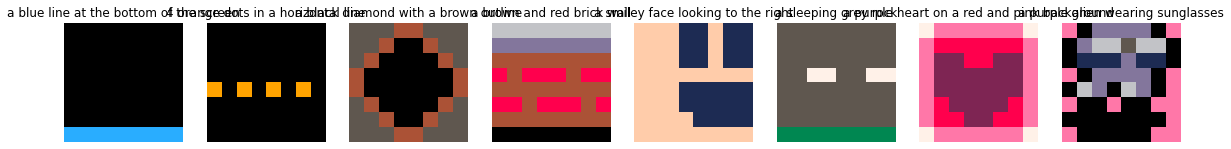

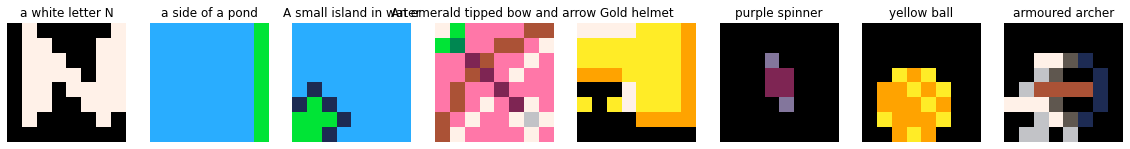

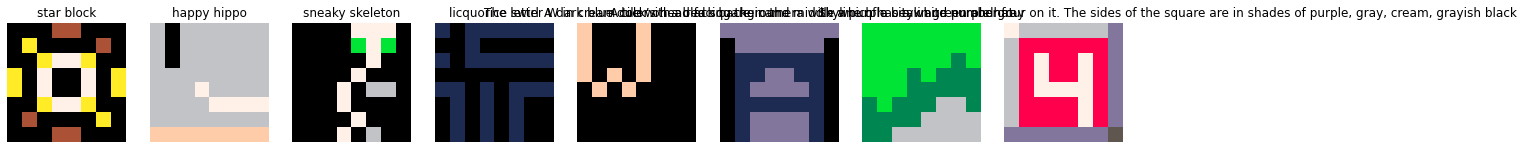

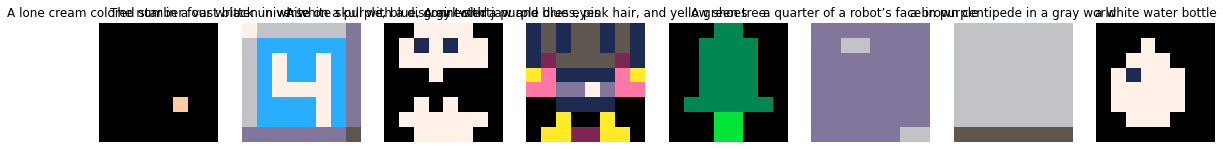

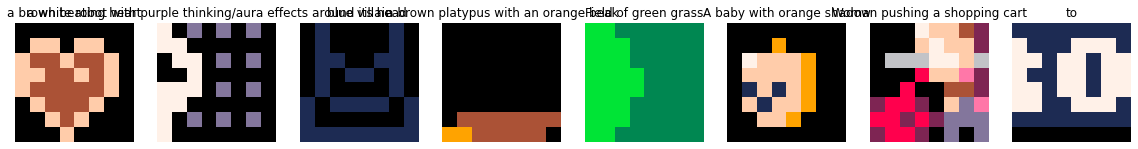

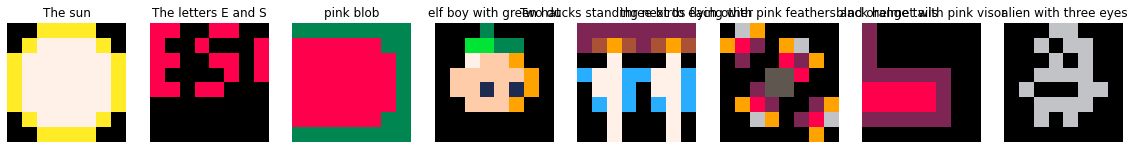

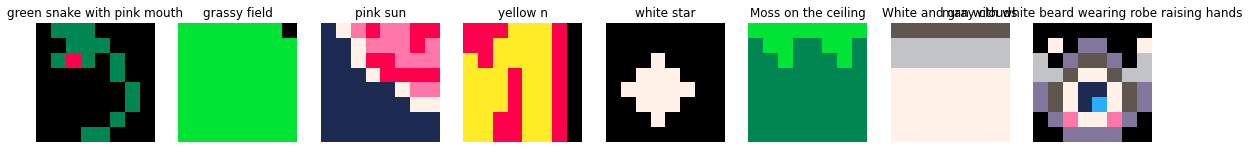

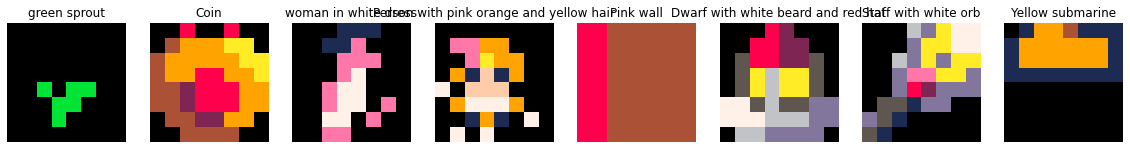

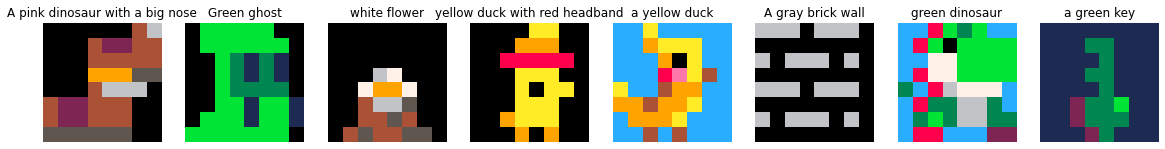

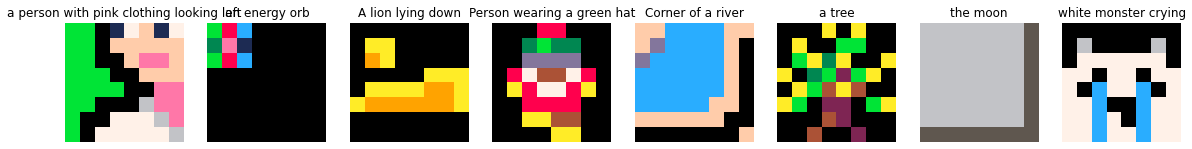

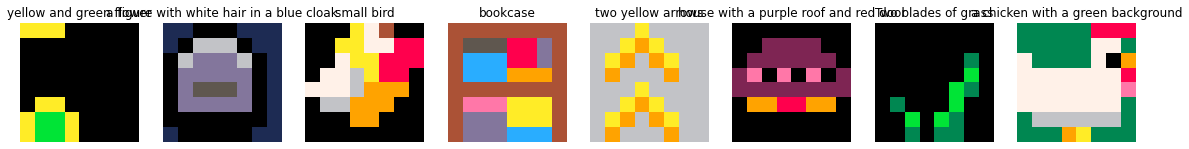

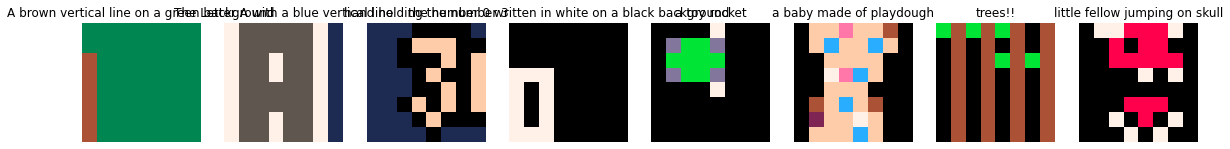

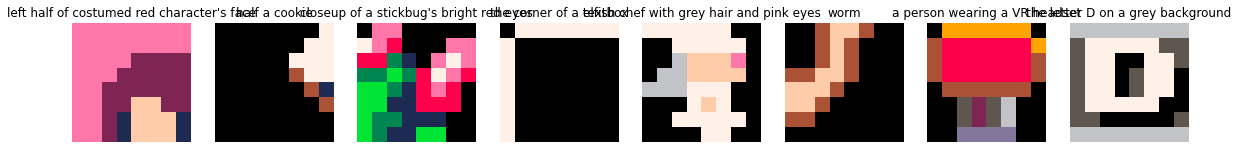

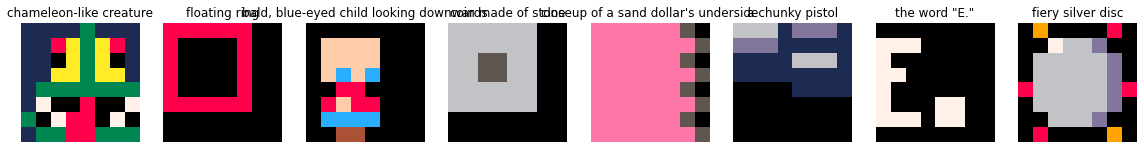

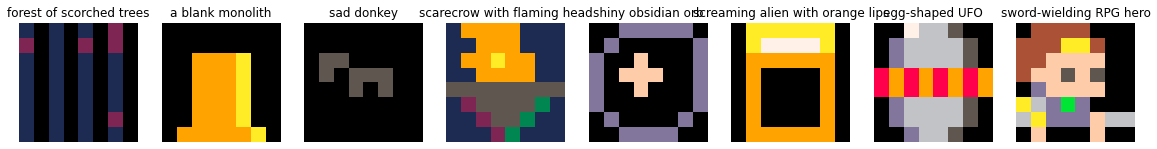

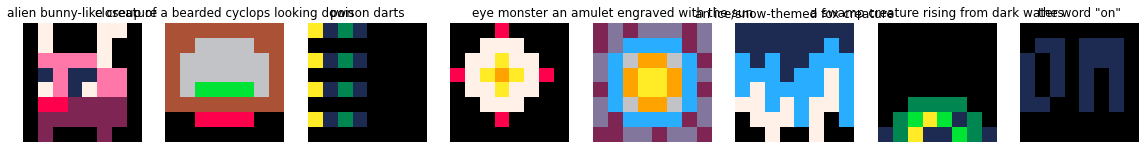

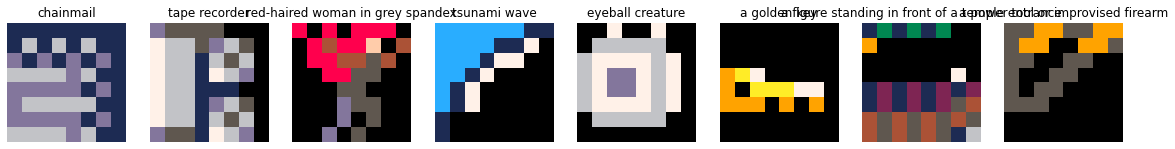

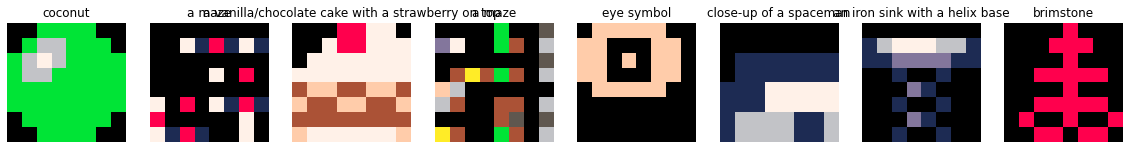

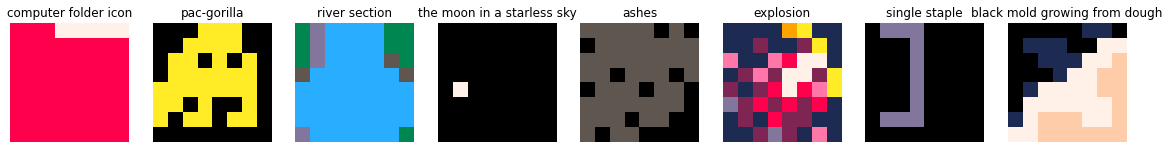

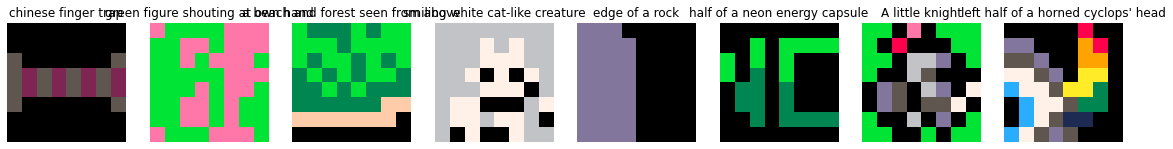

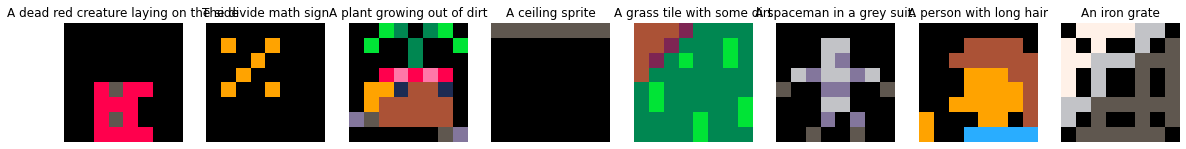

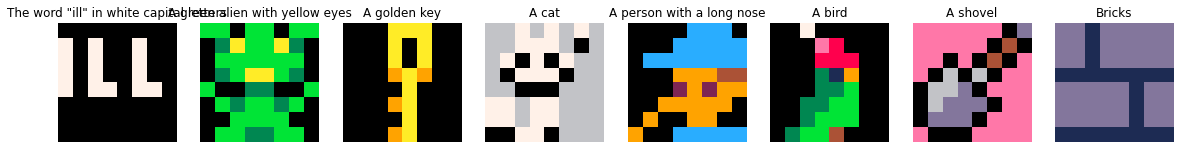

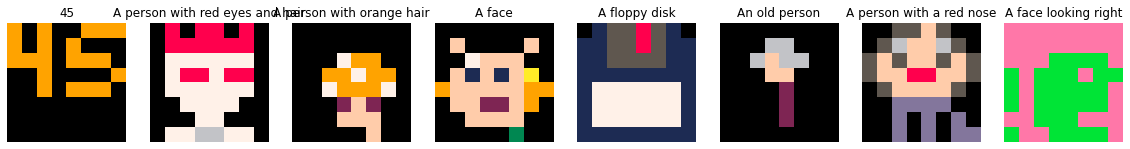

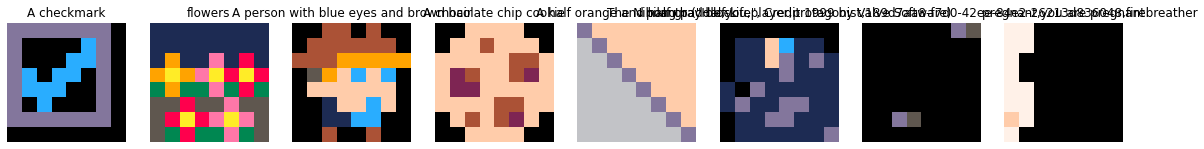

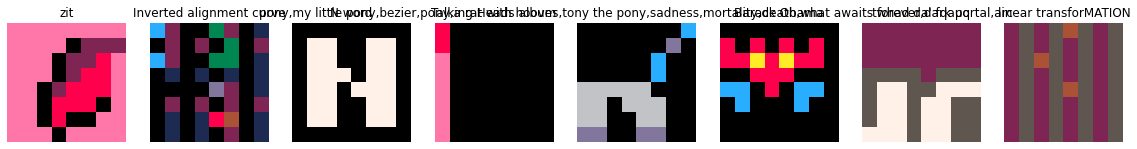

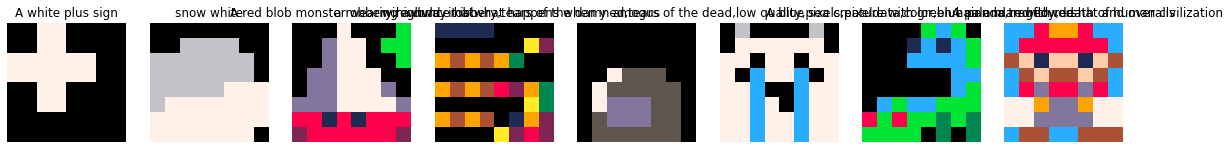

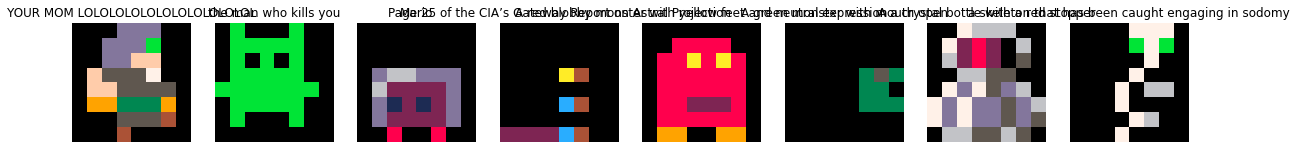

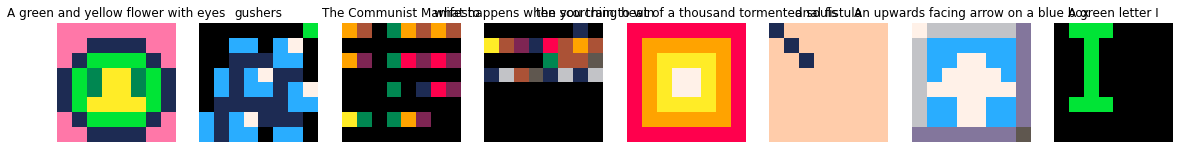

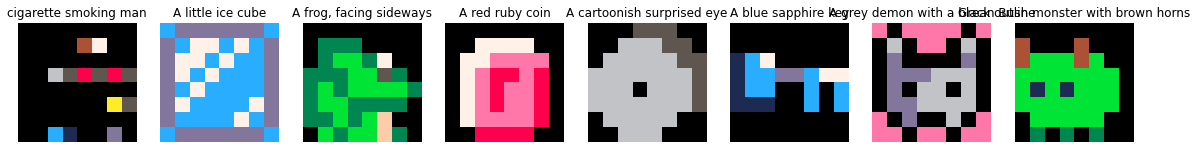

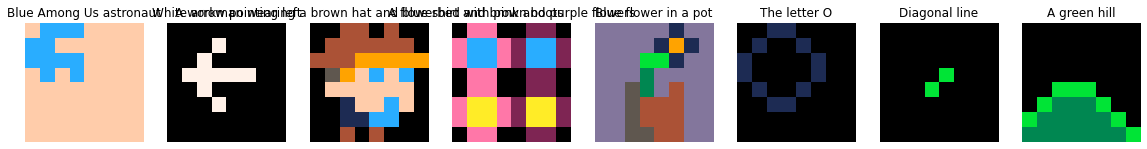

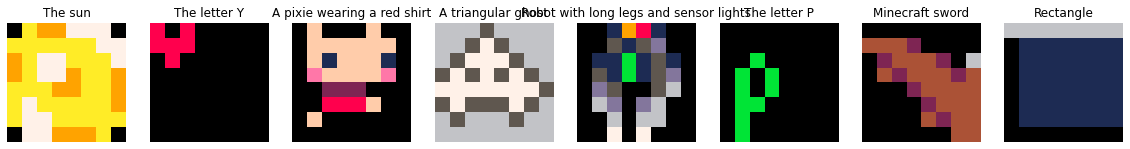

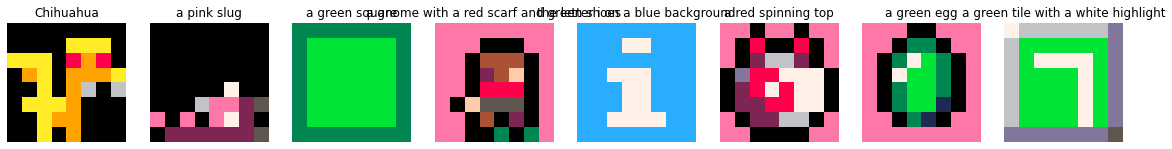

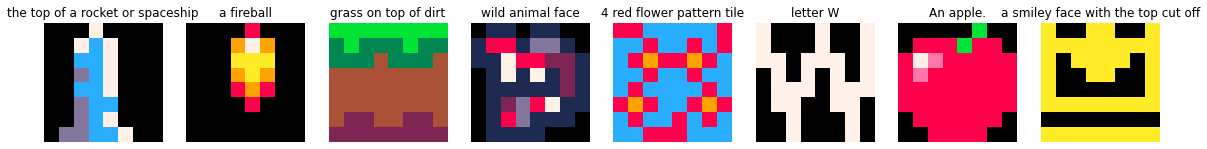

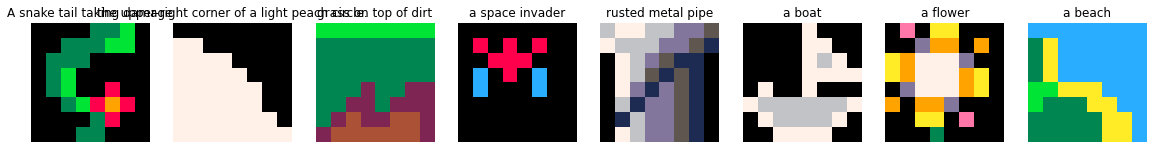

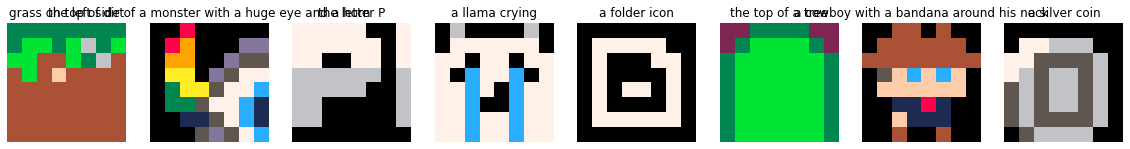

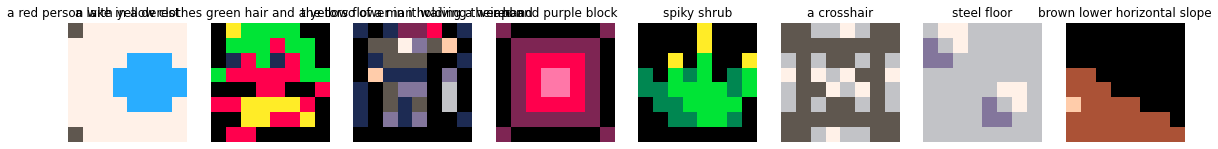

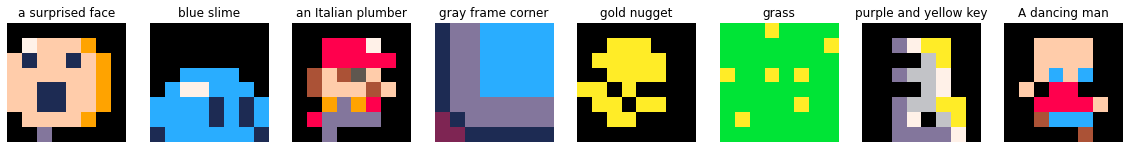

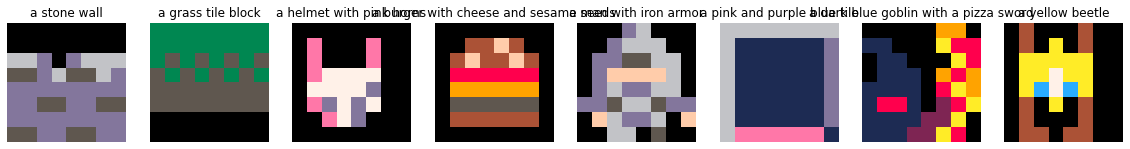

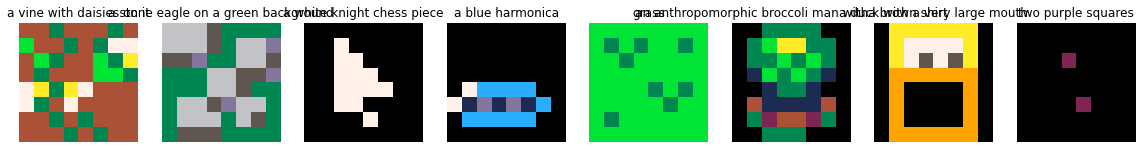

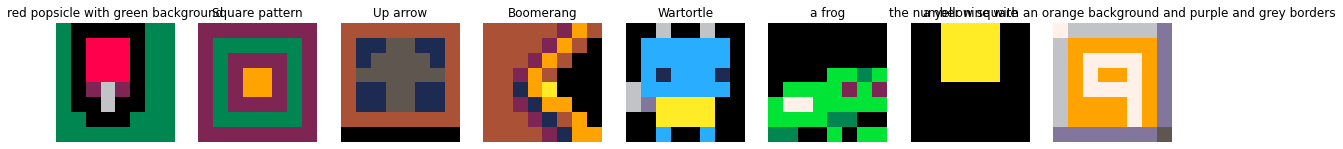

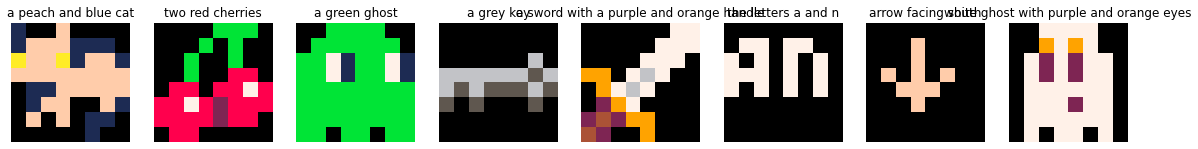

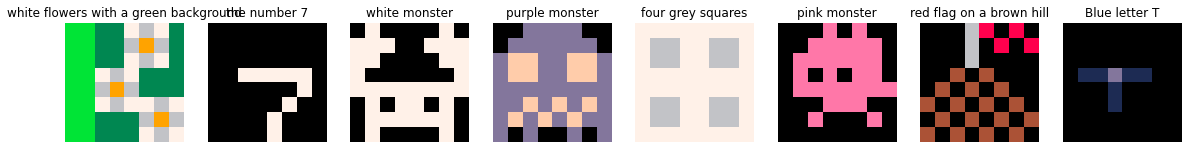

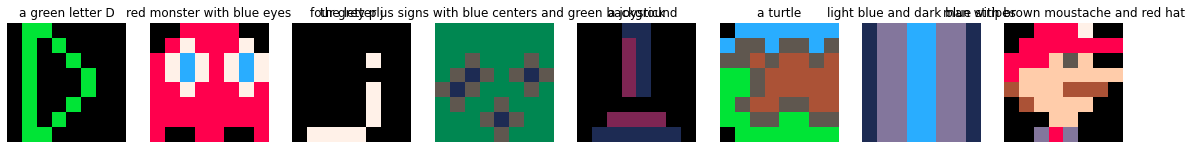

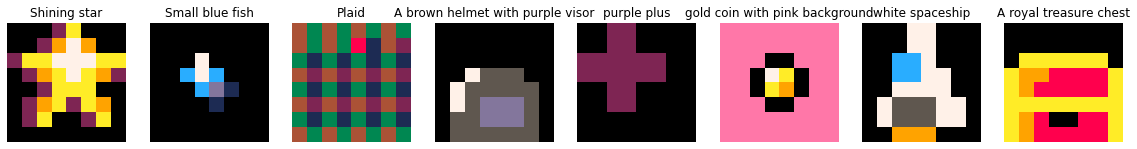

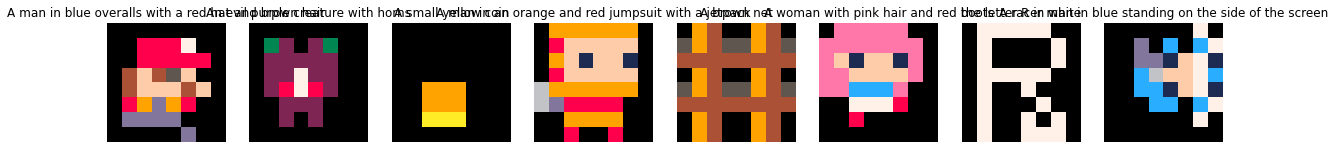

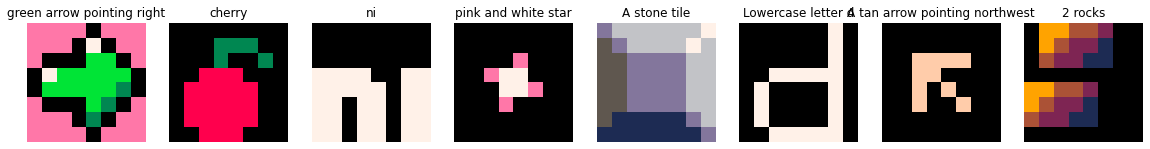

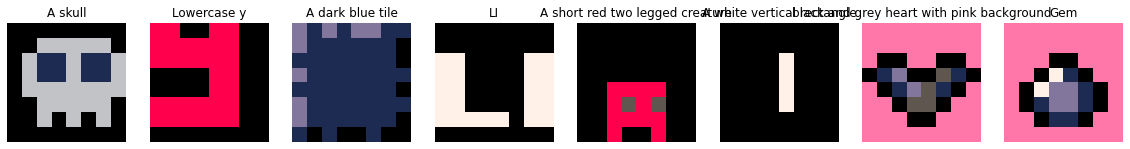

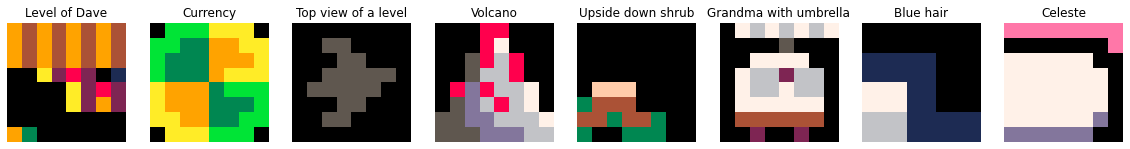

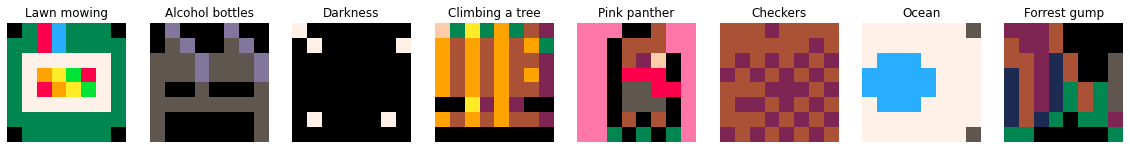

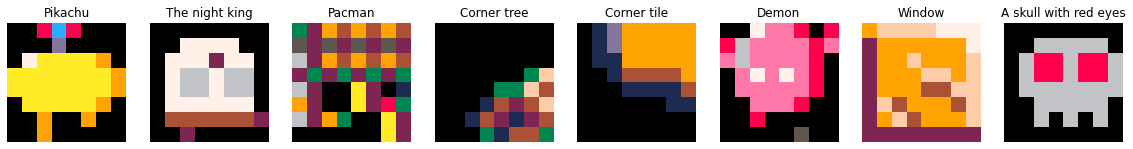

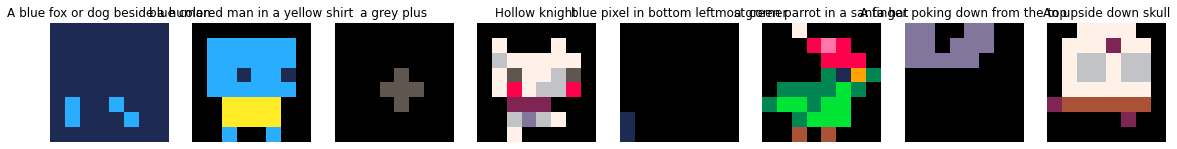

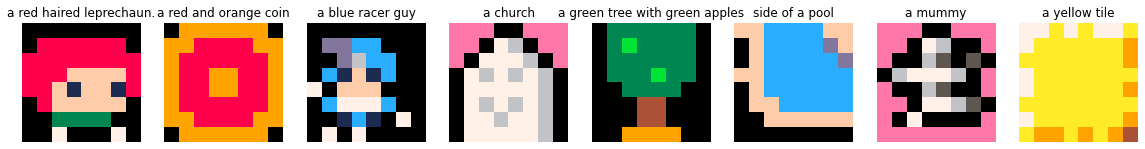

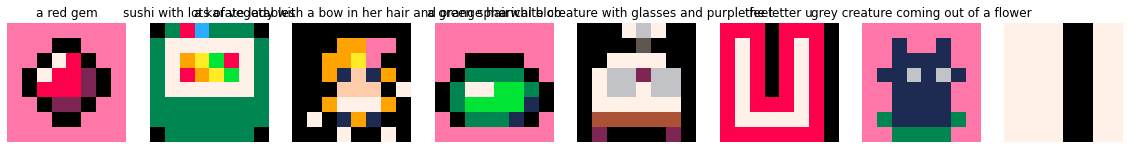

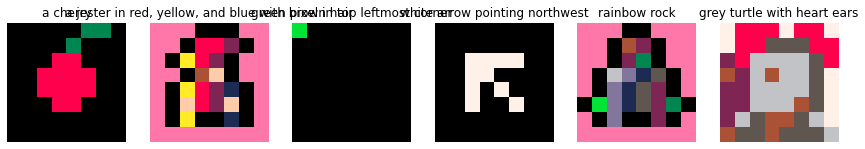

In [143]:
for i in range(0, len(labelled_sprites), 8):
    utils.showMultiSprPalette([convert_hex_to_np(sprite[1]).reshape(8,8) for sprite in labelled_sprites[i:i+8]], textArr=[sprite[0] for sprite in labelled_sprites[i:i+8]])

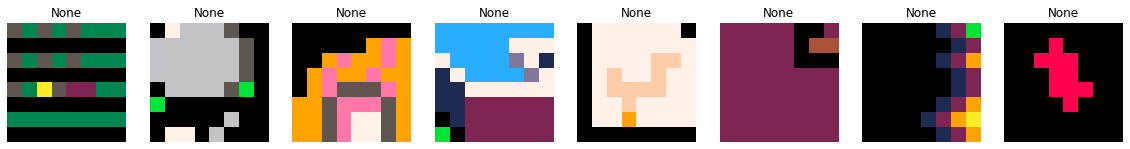

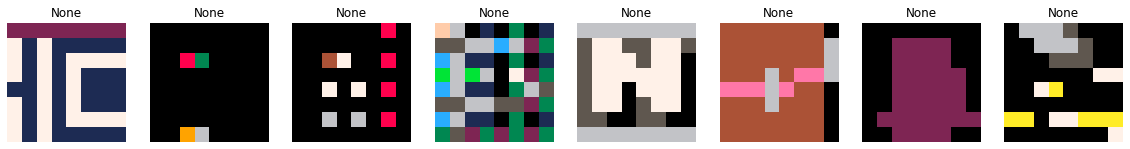

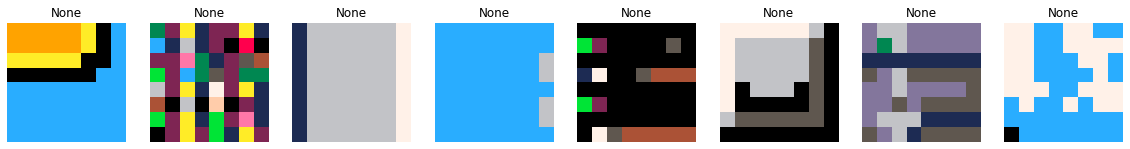

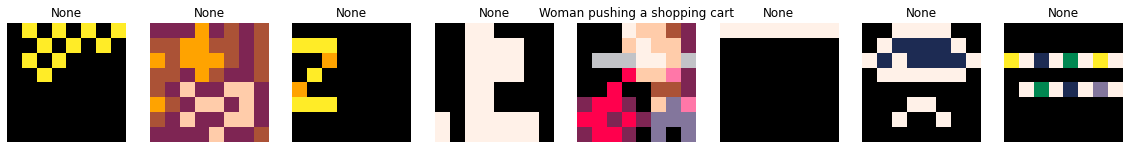

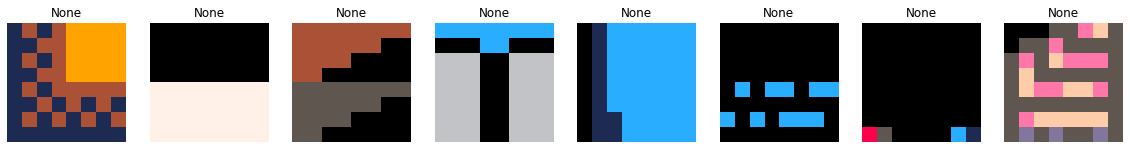

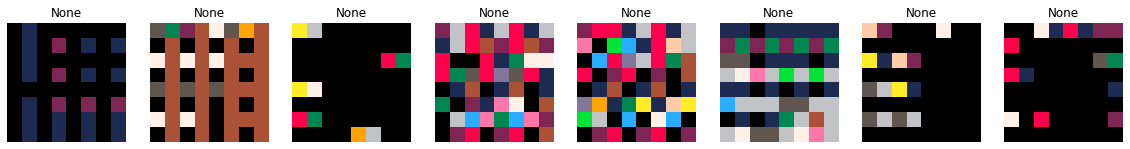

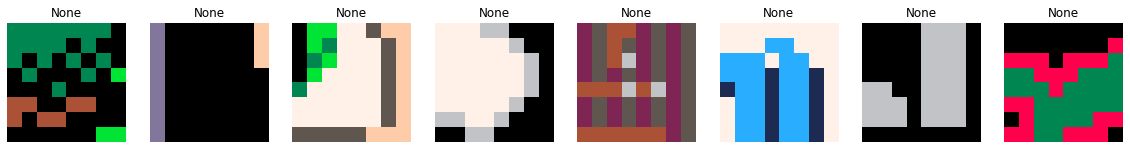

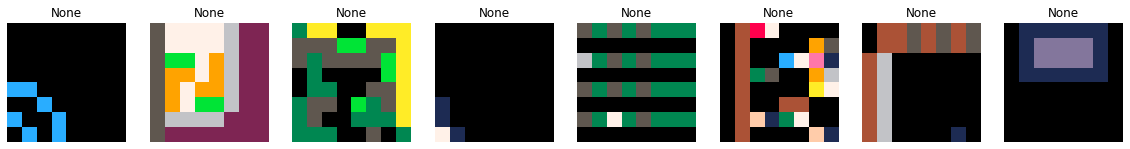

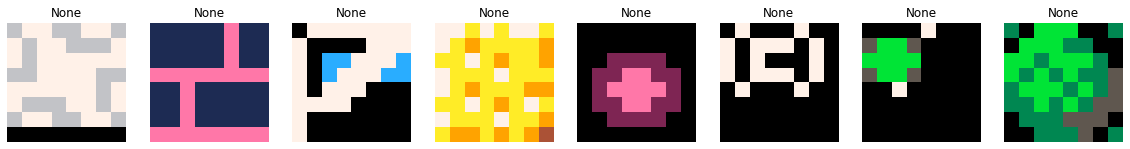

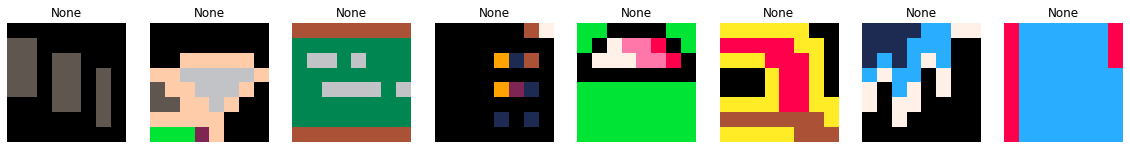

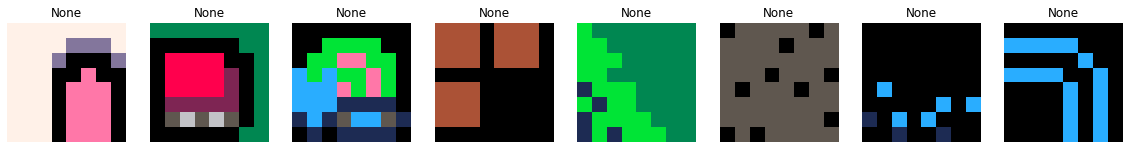

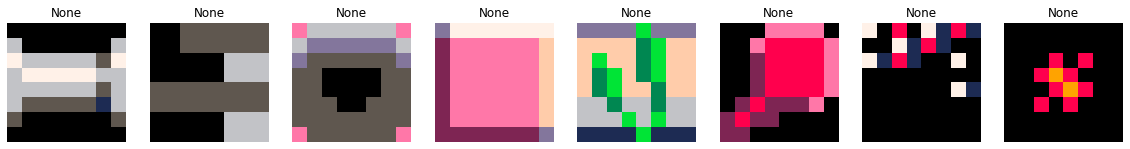

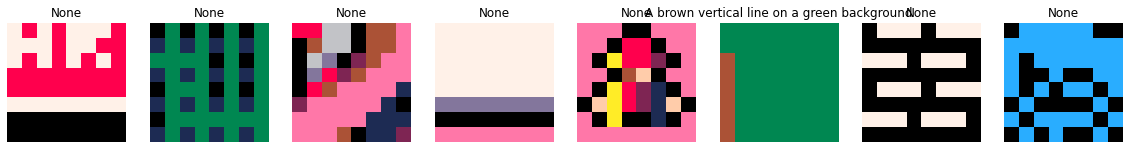

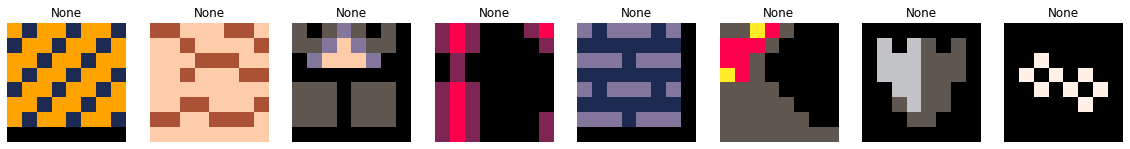

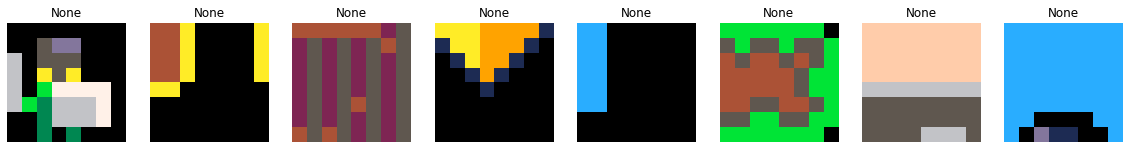

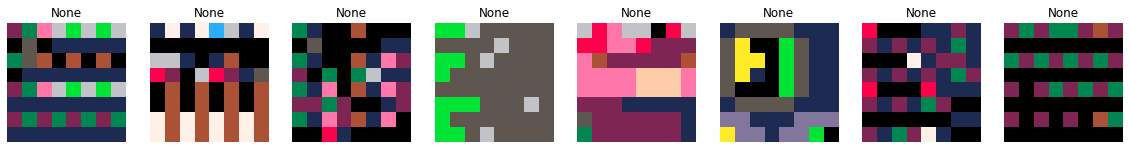

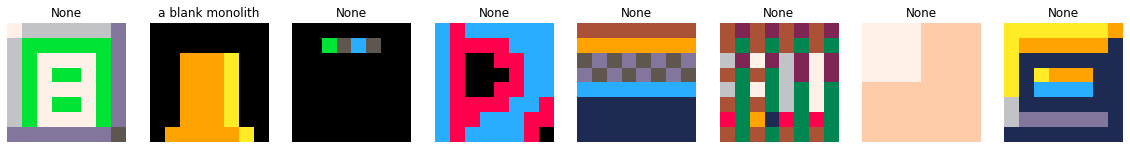

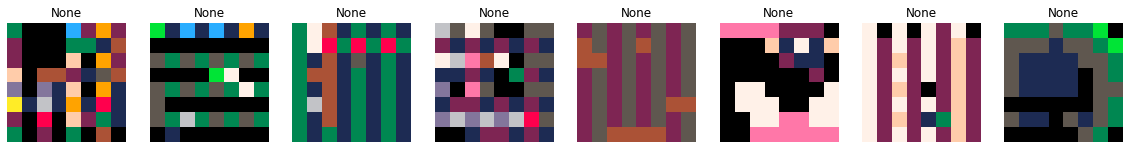

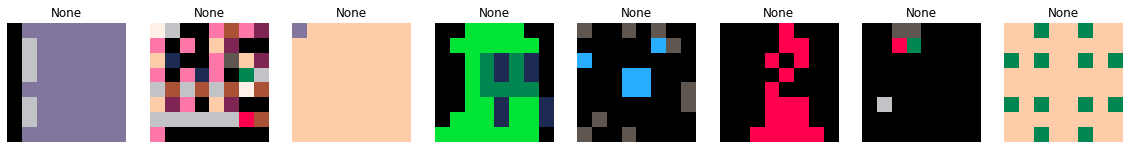

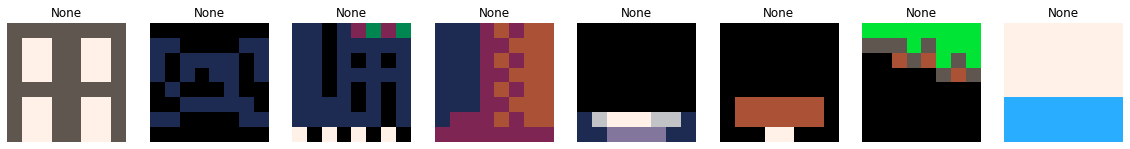

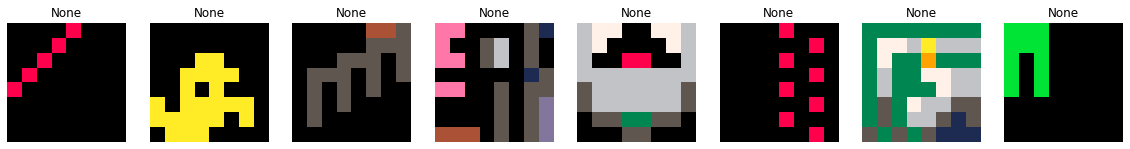

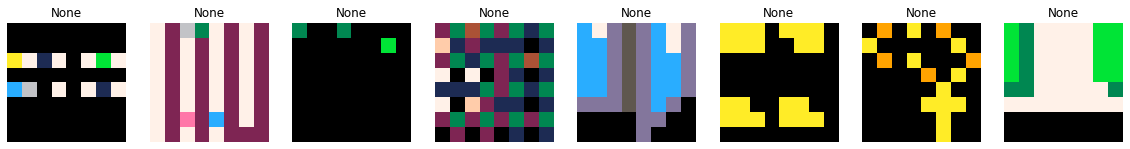

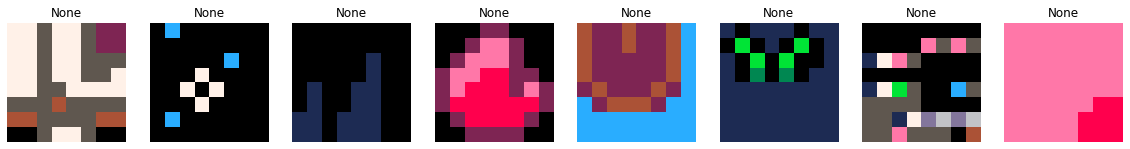

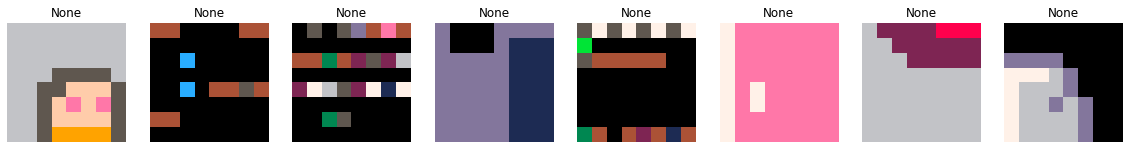

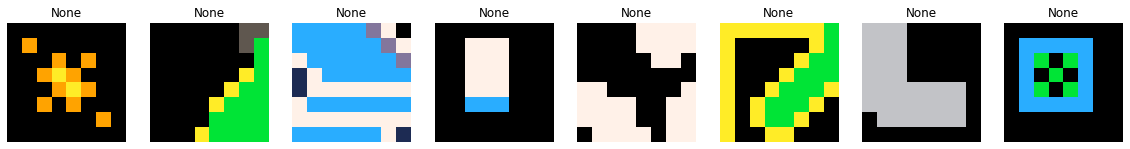

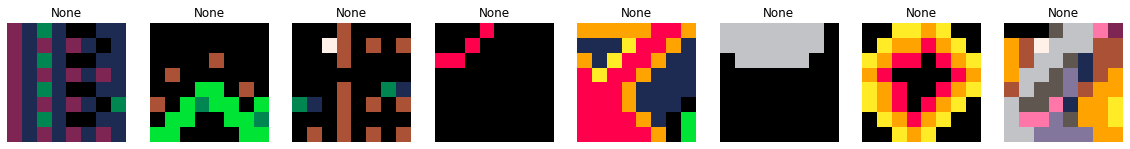

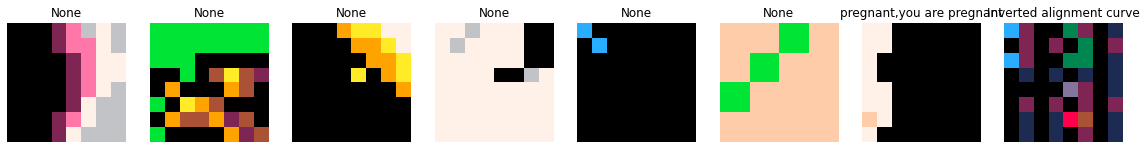

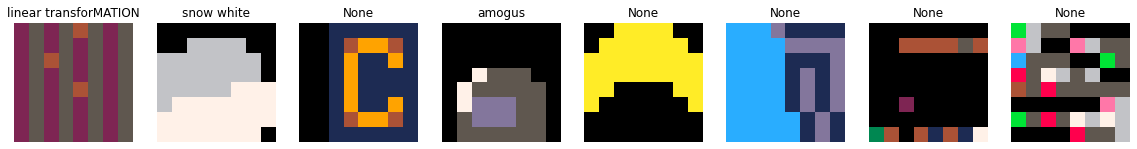

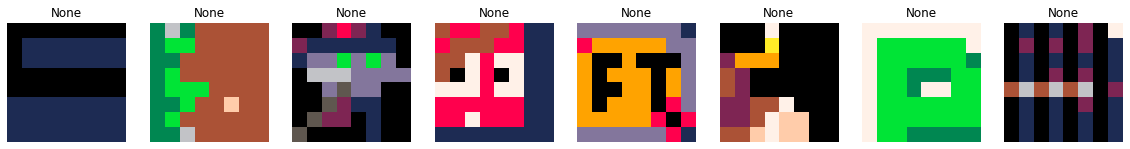

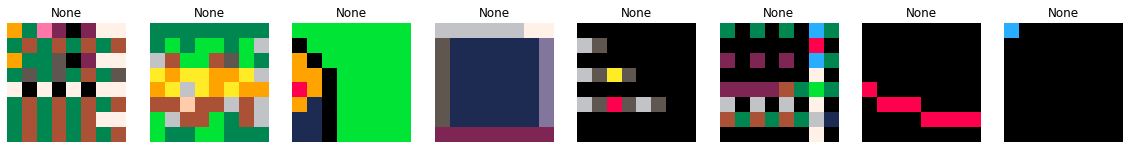

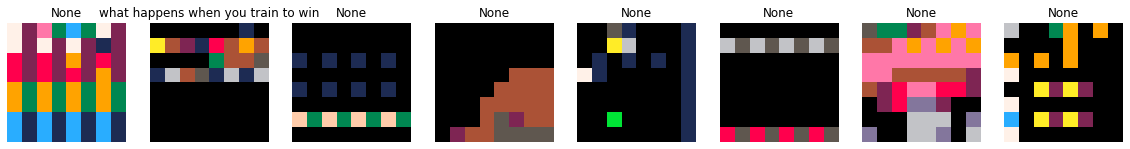

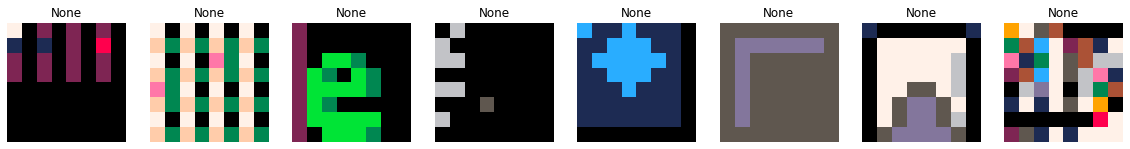

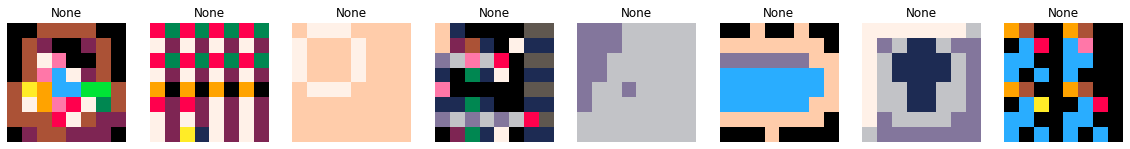

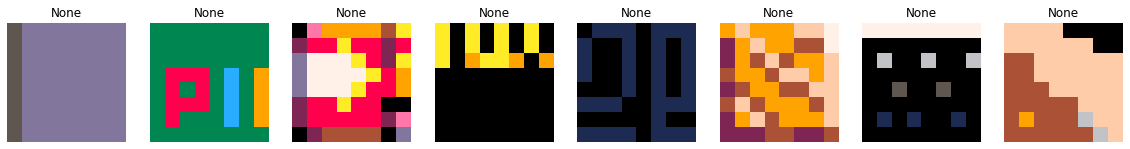

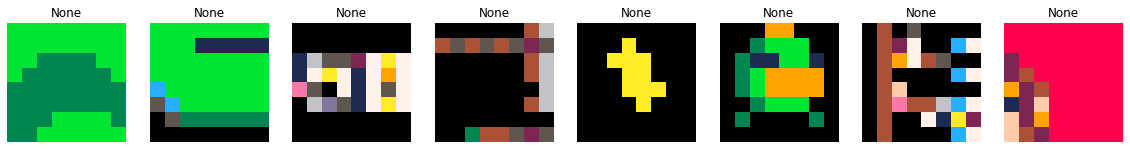

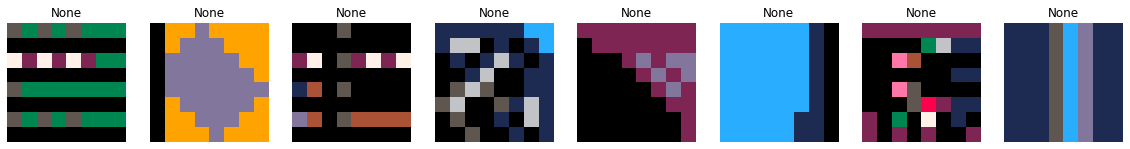

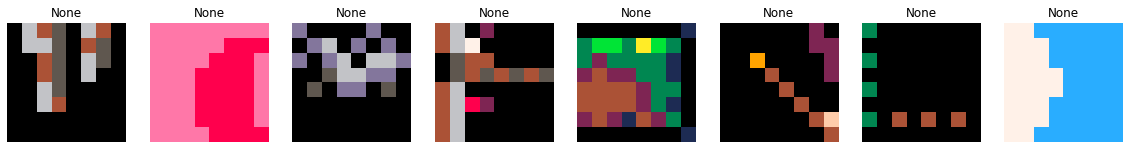

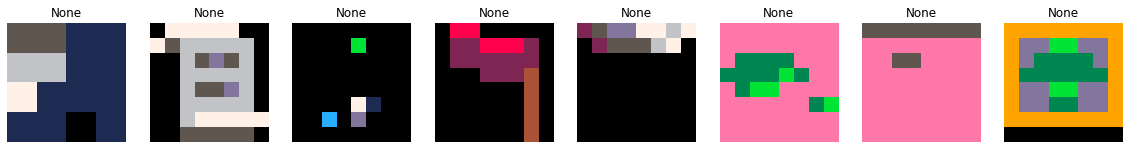

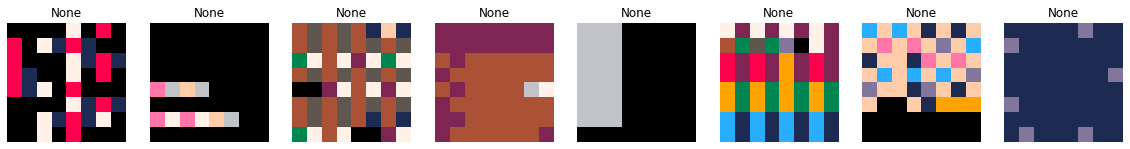

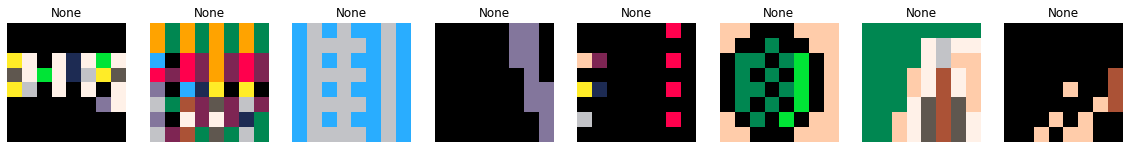

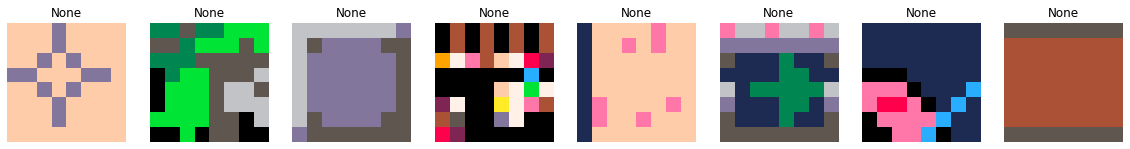

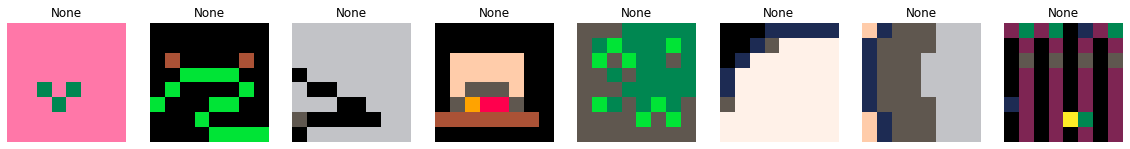

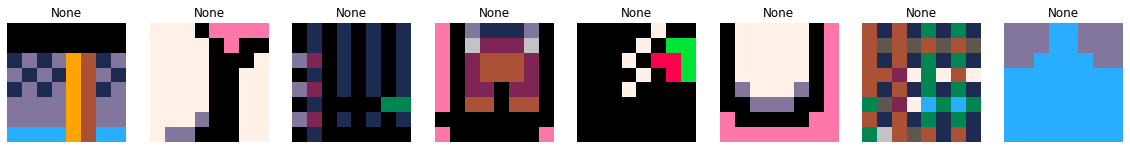

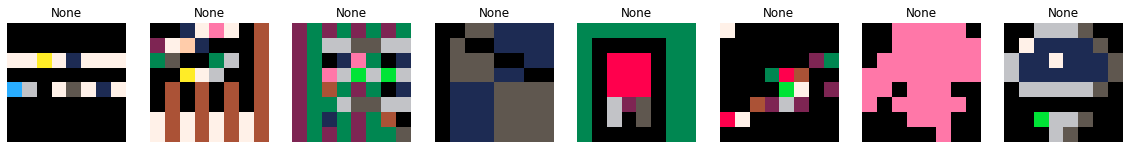

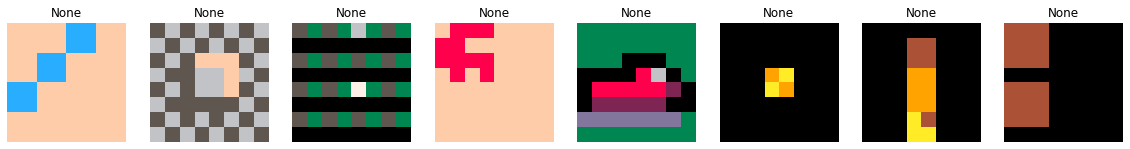

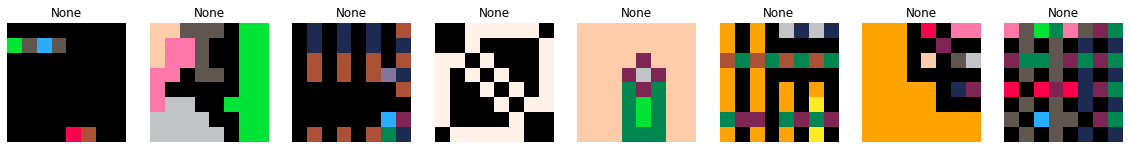

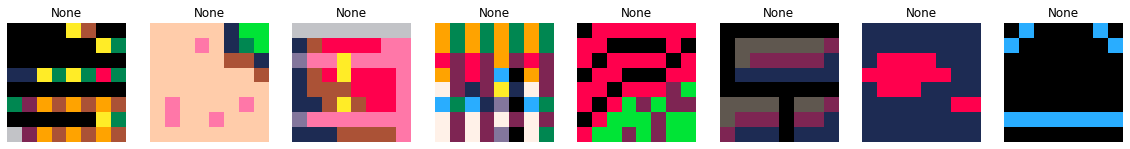

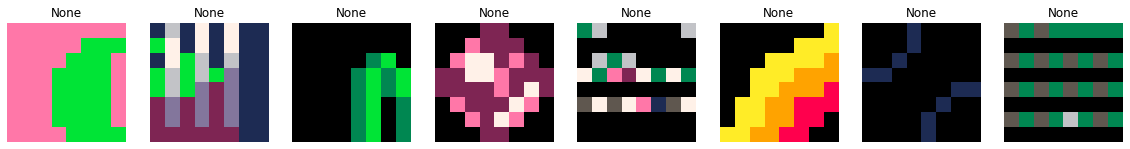

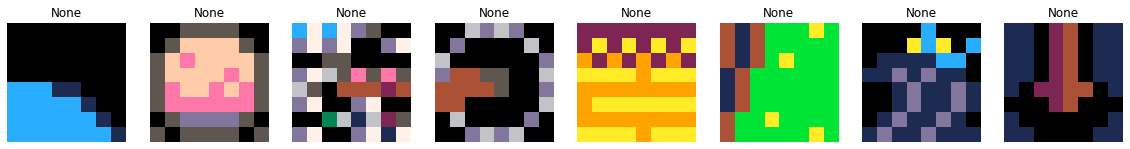

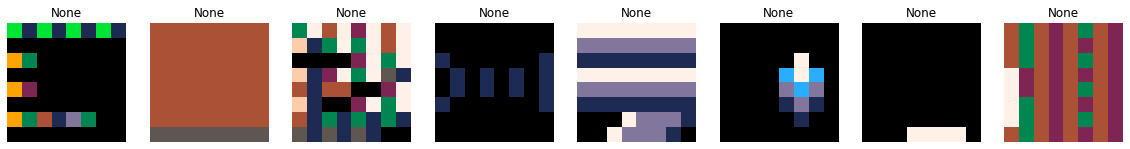

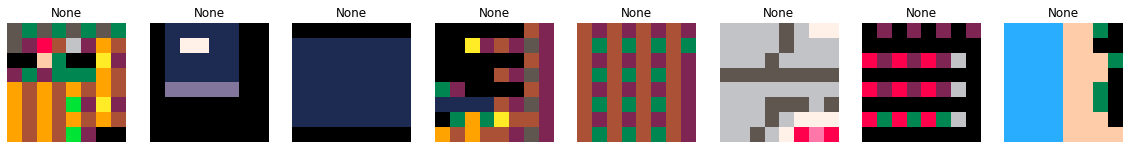

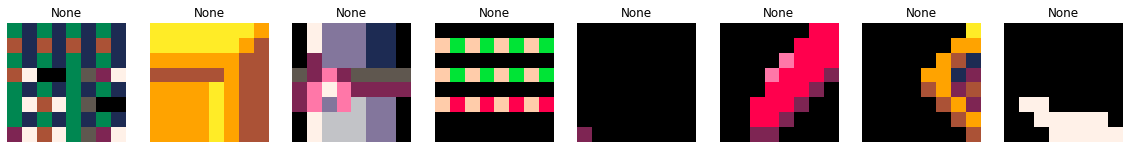

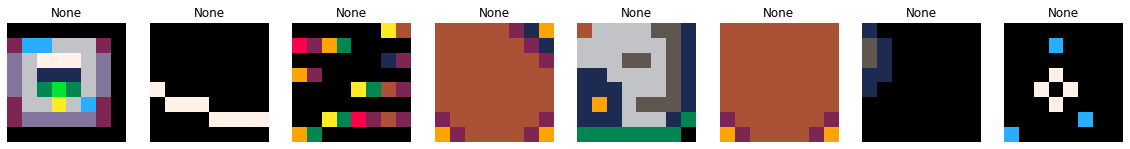

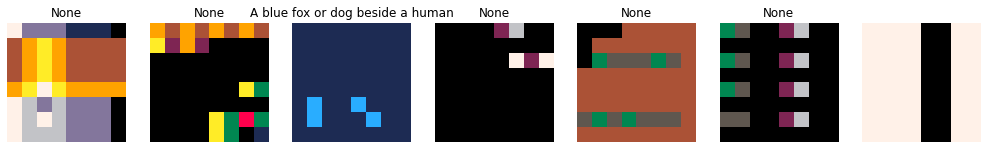

In [142]:
for i in range(0, len(unknown_sprites), 8):
    utils.showMultiSprPalette([convert_hex_to_np(sprite[1]).reshape(8,8) for sprite in unknown_sprites[i:i+8]], textArr=[sprite[0] for sprite in unknown_sprites[i:i+8]])